ROLLNUM--21111009

Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [44]:
import random
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )                         #making negative
    else:
        X[:,1] = np.abs( X[:,1] )                          #making postive
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [45]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

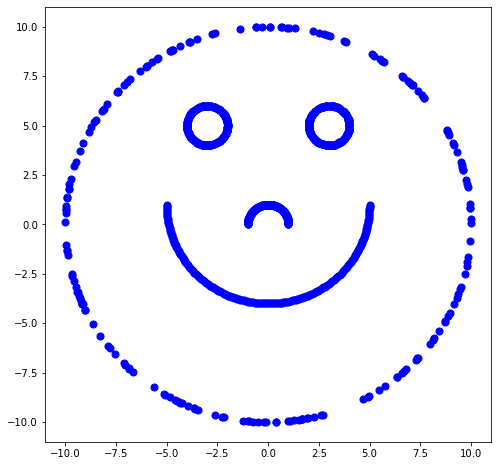

In [46]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

# 1a)

In [47]:
class KMeans:
    def __init__(self,n_clusters,max_iter = 300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    #FiTTING AND PREDICTING THE MODEL
    def fit_predict(self,data,centroids_data=None):
        
        #RANDOM CLUSTER CENTROIDS SELECTION
        
        if(centroids_data is None):                    #THIS GETS EXECUTED FOR K-MEANS
            random_index = random.sample(range(0 ,data.shape[0]), self.n_clusters)
            self.centroids = data[random_index]
        else:
            self.centroids = centroids_data    #THIS GETS EXECUTED FOR K-MEANS++
        
        for i in range(self.max_iter):
            # ASSIGNING CLUSTERS
            cluster_labels = self.assign_clusters(data)
            
            #STORING OLD CENTROID VALUES
            old_centroids = self.centroids
        
            # CALCULATING CLUSTER CENTROIDS
            self.centroids = self.new_centroids(data,cluster_labels)
            
            # CHECKING CONVERGENCE
            if (old_centroids == self.centroids).all():
                print('FOR K= {} CONVERGED AT ITER: {}'.format(self.n_clusters,i))
                break
        
        #SSE ERROR WITHIN THE CLUSTER
        e = self.sse(data,cluster_labels)
        
        return cluster_labels,self.centroids,e
    
    
    #ASSIGNING DATA POINT TO EACH CLUSTER
    def assign_clusters(self,data):
        cluster_label = []
        euc_distances = []
    
        for row_i in data:                       #each row
            for centroid in self.centroids:       #with each cluster centroid
                euc_distances.append(np.sqrt(np.dot(row_i-centroid,row_i-centroid)))    #euclidean distance
            
            index_pos = euc_distances.index(min(euc_distances))    #closest centorid
            cluster_label.append(index_pos)
            euc_distances.clear()    #emptying the list for next row_point
            
        return np.array(cluster_label)
    
    #CALCULATING MEAN IN THE CLUSTERS FOR CENTROID UPDATE
    def new_centroids(self,data,cluster_label):
        
        new_centroid_points = []
        clust_name = np.unique(cluster_label)    #cluster class labels are stored
        
        for i in clust_name:
            new_centroid_points.append(data[cluster_label == i].mean(axis=0))
            
        return np.array(new_centroid_points)
        
        
    #SUM OF SQUARED ERROR WITHIN CLUSTER FOR ELBOW-METHOD
    def sse(self,data,cluster_labels):
        ss_eroor = 0
        for i in range(data.shape[0]):
            curr_center = self.centroids[cluster_labels[i]]
#             ss_eroor += np.sqrt((data[i, 0] - curr_center[0]) ** 2 + (data[i, 1] - curr_center[1]) ** 2)
            ss_eroor += (data[i, 0] - curr_center[0]) ** 2 + (data[i, 1] - curr_center[1]) ** 2
        return ss_eroor
        
        

In [48]:
#LET NUMBER OF CLUSTERS "K"
k=5

#CREATING AN OBJECT AND PASSING "K" number of clusters
d1 = KMeans(5)

#FITTING AND PREDICTING
t1,cent,error = d1.fit_predict(X)               

FOR K= 5 CONVERGED AT ITER: 12


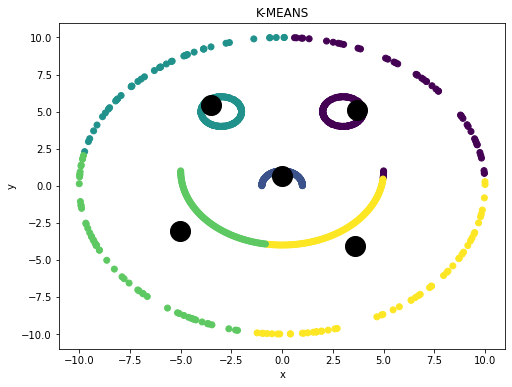

In [49]:
#PLOTTING K_MEANS
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=t1.astype(float))
plt.plot(cent[:,0],cent[:,1],'ko',  markersize=20)
plt.title('K-MEANS')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 1B)

# KMeans++

In [65]:
# STORING DATA 
data=X

# PICKING FIRST CENTROID RANDOMLY
centroid_list = data[random.sample(range(0,data.shape[0]),1)]

# CALCULATING NEXT "K-1" CENTROIDS
for c_id in range(k - 1):
    # COLLECTING DISTANCES INTO A LIST
    dist = [] 
    
    # ITERATING THROUGH EACH DATA POINT
    for row_i in data:                       
        # SETTING MAX_DISTANCE AS A HIGH VALUE
        d = 10**6           
        
        #CALCULATING WITH EXISTING CENTROIDS
        for i in range(len(centroid_list)):
#             temp = np.sqrt(np.dot(row_i-centroid_list[i],row_i-centroid_list[i]))
            temp = np.dot(row_i-centroid_list[i],row_i-centroid_list[i])
            d = min(d,temp)                        # WE NEED DISTANCE OF A POINT  WITH THE NEAREST CENTROID
        dist.append(d)
    
    #SELECTING MAX_DISTANCE POINT AS CENTROID AS IT WILL UNANIMOUSLY HAVE HIGH POROBABILITY
    next_centroid = data[np.argmax(dist), :]
    
    #APPENDING NEW CENTROID TO THE CENTROID LIST
    centroid_list = np.append(arr=centroid_list,values=[next_centroid],axis=0)
    
    #EMPTYING THE DISTANCE LIST FOR NEXT CENTROID SELECTION
    dist = []
                
    

In [66]:
#forkmeans++
d1 = KMeans(5)
t1,cent,error = d1.fit_predict(X,centroid_list)

FOR K= 5 CONVERGED AT ITER: 16


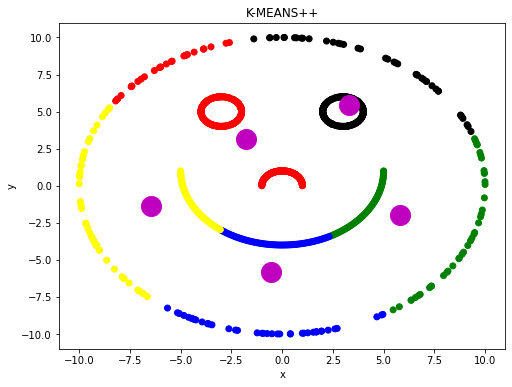

In [67]:
# for k=5
colr_m = np.array(['red','blue','green','yellow','black'])
plt.figure(figsize=(8, 6))
# plt.scatter(X[:,0], X[:,1], c=t1.astype(float))
plt.scatter(X[:,0], X[:,1], c=colr_m[t1])

# for i in range(len(colr_m)):
#     plt.plot(cent[i,0],cent[i,1],colr_m[i],  markersize=20)
plt.plot(cent[:,0],cent[:,1],'mo',markersize=20)
plt.title('K-MEANS++')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 1C)

## FINDING OPTIMAL "K" USING ELBOW METHOD

In [68]:
#CALCULATING SSE error FOR "K" CLUSTERs FOR DIFFERENT K VALUES
list_of_errors = []

#DIFFERENT K VALUES
for c in range(2,10):
    d1 = KMeans(c)
    t1,c,error = d1.fit_predict(X)
    list_of_errors.append(error)

FOR K= 2 CONVERGED AT ITER: 16
FOR K= 3 CONVERGED AT ITER: 11
FOR K= 4 CONVERGED AT ITER: 18
FOR K= 5 CONVERGED AT ITER: 9
FOR K= 6 CONVERGED AT ITER: 24
FOR K= 7 CONVERGED AT ITER: 11
FOR K= 8 CONVERGED AT ITER: 16
FOR K= 9 CONVERGED AT ITER: 27


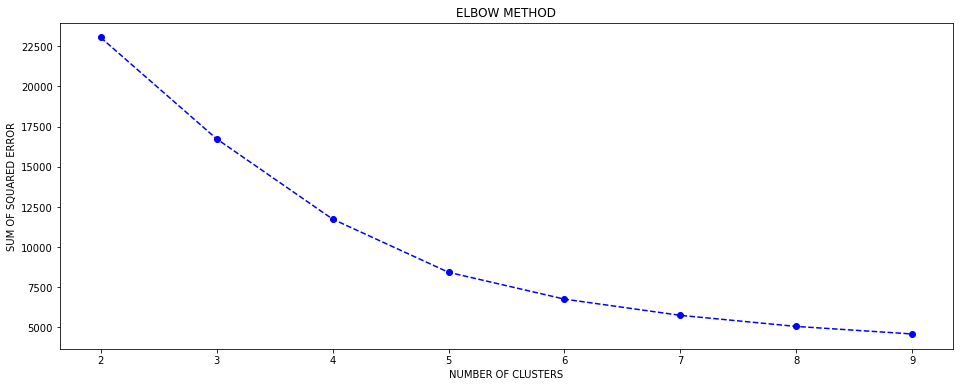

In [69]:
fig, b = plt.subplots(figsize=(16,6))
plt.plot(list(range(2, 10)),list_of_errors,linestyle='--', marker='o', color='b')
b.set_title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('SUM OF SQUARED ERROR')
plt.show()

<u>POINTS<u>:

<u><h3>USING ELBOW TECHNIQUE </h3></u> 
    
FROM THE ABOVE PLOT WE CAN INFER THAT K=5 CAN BE CONSIDERED AS OPTIMAL FOR K-MEANS
WE CAN OBSERVE THAT CLUSTERING IS NOT IDEAL, AS STANDARD KMEANS CANNOT DRAW A NON-LINEAR CLASSIFIER
AND SO WE ARE NOT HAPPY WITH THIS CLUSTERING.

SO WE USE KERNEL K-MEANS (with Gaussian kernel)

# 1D)

## GAUSSAIN KERNEL

In [76]:
# GAUSSIAN KERNEL
def gaussian_kernel(X):
    #This function will transform the input data into a kernalized data matrix
    
    #KERNEL K MEANS WITH "LANDMARKS METHOD" APPROACH     
    g = 1/(np.std(X)**2)
    return np.array([np.exp(-g*np.linalg.norm(X - X[i], axis=1)**2) for i in range(X.shape[0])])

# returns a matrix of (1000,1000)

In [77]:
# Transform the input space using kernel function
X_transformed = gaussian_kernel(X)

FOR K= 5 CONVERGED AT ITER: 3


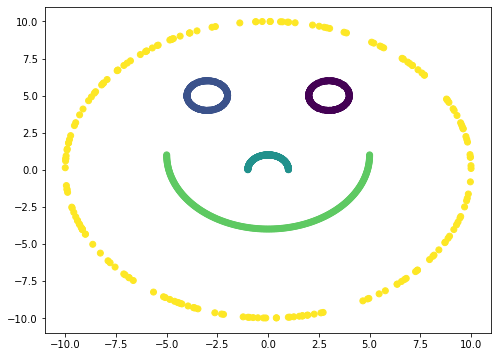

In [78]:
k=5
d1 = KMeans(5)
t1,cent,error = d1.fit_predict(X_transformed)

# for k=5
# colr_m = ['red','blue','green','yellow','black']
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=t1.astype(float))
# plt.plot(cent[:,0],cent[:,1],'bo',  markersize=20)

In [15]:
#COMMENTs 
# RUN ABOVE GAUSSIAN KERNEL ATLEAST TWICE

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

### SOLUTIONS

# 2a) 

Let $k$ be the number of Spherical Gaussians
$$
$$
$$
\theta=\left\{\mu_{1}, \mu_{2}, \ldots \mu_{k}, \sigma_{1}^{2}, \sigma_{2}^{2}, \ldots \sigma_{k}^{2}\right\}
$$

Density of spherical gaussian => $N\left(u, \sigma_{I_{d}}^2\right), x \in R^{d}$
$$
P(x)=\frac{1}{(2 \pi)^{d / 2} \sigma^{d}} \operatorname{exp}\left(\frac{-\|x-\mu\|^{2}}{2 \sigma^{2}}\right)
$$
$$
$$
Let$$x=\left\{n_{1}, n_{2}, \ldots n_{n}\right\} \text { are } n \text { i.i.d and } 
z=\left\{z_{1}, z_{2}, \ldots z_{n}\right\} \text {are Corresponding latent variables}
$$
$$
$$
likelihood of i'th sample came from spherical gaussian $k$ be $\pi_{k}$
$$
$$
$$
P\left(z_{i}=k / \theta\right)=\pi_{k}
$$
$$
$$

We have mixture weights as
$\left\{\pi_{1}, \pi_{2}, \ldots \pi_{k}\right\},$ given these are fixed
$$
$$
let
$$
$$
$$
\theta=\left\{\mu_{1}, \mu_{2}, \cdots \mu_{k}, \sigma_{1}^{2}, \sigma_{2}^{2}, \ldots \sigma_{n}^{2}, \pi_{1}, \pi_{2}, \ldots \pi_{k}\right\}
$$
$$
$$
likelihood of observing a data point 'i' given that it is from spherical gausion ' $k$ ' is
$$
$$
$$
P\left(x_{i} \mid z_{i}=k, \mu_{k}, \sigma_{k}^{2}\right)=N\left(x_{i} / \mu_{k}, \sigma_{k}^{2}\right)
$$
$$
$$
Probabitity of observing all data points
$$
\begin{aligned}
P(x, z / \theta) &=\prod_{n=1}^{N} P\left(x_{n}, z_{n} / \theta\right) \\
&=\prod_{n=1}^{N} P\left(\left.z_{n}\right|{\theta}\right) P\left(x_{n} / z_{n}, \theta\right) \\
&=\prod_{n=1}^{N} \prod_{k=1}^{K}\left(\pi_{k}\right)^{z_{n k}} \prod_{k=1}^{K} P\left(x_{n} / z_{n}=k, \theta\right)
\end{aligned}
$$
$z_{n k}$ is the responsibilty  that $n^{\text {th }}$ data point belongs to cluster $k$ or not.
$$
$$
$$
z_{n 1}+z_{n 2}+\cdots+z_{n k}=1 \quad \forall n \in N
$$
$$
$$
$$
=\prod_{n=1}^{N} \prod_{k=1}^{K}\left[\pi_{k} * P\left(x_{n}|z_{n}=k, \theta \right)\right]^{z_{n k}}
$$
$$
$$
For simplification taking $\log$
$$
$$
$$
\begin{aligned}
&=\log \prod_{n=1}^{N} \prod_{k=1}^{K} \left[\pi_{k} * P\left(x_{n}| z_{n}=k, \theta\right)\right]^{Z_{n k}} \\
&=\sum_{n=1}^{N} \sum_{k=1}^{K} \log \left[\pi_{k} * P\left(x_{n}| z_{n}=k, \theta\right)\right]^{z_{n k}} \\
&=\sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}\left[\log \pi_{k}+\log P\left(x_{n}| z_{n}=k, \theta\right)\right]
\end{aligned}
$$
We know
$$
\begin{aligned}
&P(x_{n}| z_{n}=k, \theta) = P\left(x_{n}| z_{n}=k,\mu^2,\sigma_{k}^2\right) = N \left(x_{n}|\mu_{k},\sigma_{k}^2\right) \\
&=\frac{1}{(2\pi)^{\frac{d}{2}}\sigma_k^d} \operatorname{exp}(- \frac{||x-\mu_k||^2}{2 \sigma_k^2})
\end{aligned}
$$

$$
\begin{aligned}
&=\sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}[\log \pi_{k}+\log \frac{1}{(2 \pi)^{\frac{d}{2}}\sigma_{k}^{d}} \operatorname{exp}(\frac{-\|x_{n}-\mu_k\|^{2}}{2 \sigma_{k^{2}}})] \\\\
 &=\sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}[\log \pi_{k}-\frac{\|x_{n}-\mu_{k}\|^{2}}{2 \sigma_{k}{ }^{2}}-\frac{d}{2} \log (2 \pi)-d \log \sigma_{k}]   ---Eqn 1
\end{aligned}
$$
$$
$$
Now Since we dont know the responsibilities, we estimate them in the 'ESTIMATION' step 
$$
$$
We compute conditional posterior $p(z / x, \hat{\theta})$ 
$$
$$
Since data points arc i.i.d, 
$$
$$
we compute Seperately for each $n$ . 
$$
$$
From Bayes theorem, 
$$
$$
$$
\begin{aligned}
&P(z_n=k|x_n,\hat\theta) \space \operatorname{\alpha} \space P(z_n=k| \hat\theta)P(x_n|z_n=k,\hat\theta) \\
\end{aligned}
$$
$$
$$
$$
\begin{aligned}
 =\pi_{k} N\left(x_{n} | \hat{\mu}_{k}, \hat{\sigma}_{k}^{2}\right) \forall n, k \\
\end{aligned}
$$
$$
$$
$$
\begin{aligned}
&E\left[z_{n k}^{t}\right]=\frac{\pi_{k} N\left(x_{n} \mid \hat{\mu}_{k}, \hat{\sigma}_{k}^{2}\right)}{\sum_{k=1}^{k} \pi_{k} N\left(x_n | \hat{\mu_{k}}, \hat{\sigma}_{k}^{2}\right)} \quad \forall n, k \\
\end{aligned}
$$
$$
$$
Now as we estimated $z_{n k}, \forall$ n, k we have to update $\theta$ i.e $\mu_{k}, \sigma_{k}^{2}; \space \forall$  k to maximize the probability of observing all the data points i.e maximize equation (1) 
$$
$$
$$
\hat{\theta}=\operatorname{argmax}_{\theta} \sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}\left[\log \pi_{k}-\frac{\left\|x_{n}-\mu_{k}\right\|^{2}}{2 \sigma_{k}^{2}}-\frac{d}{2} \log 2 \pi-d \log \sigma_{k}\right]
$$
$$
$$
To maximize $\mu_{k}, \sigma_{k}$, we individually do derivate wrt them.
First, let us do for $\mu_k$
$$
$$
$$
\begin{aligned}
\frac{\partial P(x, z / \theta)}{\partial \mu_{k}} &=\sum_{n=1}^{N} z_{n k}\left[\frac{2 *\left(x_{n}-\mu_{k}\right)}{2  \sigma_k^{2}}\right] \\
0 &=\sum_{n=1}^{N} z_{n k} *\left(x_{n}-\mu_{k}\right) \\
&\implies \sum_{n=1}^{N} z_{n k} * \mu_{k}=\sum_{n=1}^{N} z_{n k} * x_{n}  \\
\mu_{k}=& \frac{\sum_{n=1}^{N} z_{n k} *x_n}{\sum_{n=1}^{N} z_{nk}}; \forall k\\
\text{Now let us do for } \sigma_k, \\
\end{aligned}
$$
$$
$$$$
\begin{aligned}
\frac{\partial P(x, z / \theta)}{\partial \sigma_{k}} &= \sum_{n=1}^{N} z_{n k} \left[\frac{\|x_n - \mu_k\|^2}{\sigma_k^3} - \frac{d}{\sigma_k}\right] \\
& 0= \sum_{n=1}^{N} z_{nk} * \left[\frac{\|x_n - \mu_k\|^2}{\sigma_k^2} - d \right] \\
 & \sum_{n=1}^{N} z_nk*d= \sum_{n=1}^{N} z_{nk}*\frac{\|x_n - \mu_k\|^2}{\sigma_k^2} 
\end{aligned}
$$
$$
\begin{aligned}
&d * \sum_{n=1}^{N} z_{n k}=\frac{1}{\sigma_{k}{ }^{2}} \sum_{n =1}^{N} z_{n k} *\left\|x_{n}-\mu_{k}\right\|^{2} \\
&\sigma_{k}^{2}=\frac{\sum_{n=1}^{N} z_{n k} *\left\|x_{n}-\mu_{k}\right\|^{2}}{d * \sum_{n=1}^{N} z_{n k}}
\end{aligned}
$$
We dont need to update  $\pi_{k}$ since it is given as fixed. 
$$
$$
So our final EM algoritim is
$$
$$
$\underline{E-step}:$
$$
\begin{aligned}
&z_{n k}^{(t+1)}=\frac{\pi_{k} N({x_n} | \mu_{k}^{(t)}, \sigma_{k}^{(t)^{2}} I_{d})}{\sum_{k=1}^{K} \pi_k N(x_n|\mu_{k}^{(t)}, \sigma_{k}^{(t)^{2}} I_{d})} \quad; \forall n, k
\end{aligned}
$$
$$
$$
$\underline{M-step}:$ 
$$
$$$$
\begin{aligned}
&\mu_{k}^{(t+1)}=\frac{\sum_{n=1}^{N} z_{nk}^{(t+1)}*x_n}{\sum_{n=1}^{N} z_{nk}^{(t+1)}} , \\
& \\
&{\sigma_{k}^{(t+1)}}^2=\frac{\sum_{n=1}^{N} z_{nk}^{(t+1)}*\|x_n-\mu_k^{(t+1)}\|^2}{d*\sum_{n=1}^{N} z_{nk}^{(t+1)}}
\end{aligned}
$$

# 2b)

In [16]:
from scipy.special import logsumexp
from scipy import linalg, sparse
import numpy.linalg as lin
import numpy.random as rnd
import pandas as pd

In [17]:
# MAXIMIZATION STEP

def maxm_step(log_resp):
    
    n_samples, _ = X.shape
    
    #MEANS AND COVARIANCES OF EACH CLUSTER
    means, covariances = func_gaussian_parameters(np.exp(log_resp))
    
    # CHOLESKY PRECISIONS
    precisions_cholesky= compute_precision_cholesky(covariances)
    
    return means,precisions_cholesky

In [18]:
#RETURN LOG OF FIXED WEIGHTS
def func_log_weights():
    return np.log(fxd_wts)

In [19]:
#CALCULATE LOG OF DETERMINANT OF CHOLESKY PRECISIONS
def func_log_det_cholesky(matrix_chol, n_features):
    log_det_chol = n_features * (np.log(matrix_chol))                   #NO OF FEATURES * LOG(CHOLESKY PRECISIONS)
    return log_det_chol

In [20]:
#CALCULATE THE LOG GAUSSIAN PROBABILITIES
def func_log_gaussian_prob(means, precisions_chol):
    n_samples, n_features = X.shape
    num_comp, _ = means.shape
    
    log_det = func_log_det_cholesky(precisions_chol, n_features)
    precisions = precisions_chol ** 2
    log_prob = (np.sum(means ** 2, 1) * precisions- 2 * np.dot(X, means.T * precisions)+ np.outer(np.einsum("ij,ij->i", X, X), precisions))
    
    # Since we are using the precision of the Cholesky decomposition,
    # - 0.5 * log_det_precision` becomes `+ log_det_precision_chol
    
    return -0.5 * (n_features * np.log(2 * np.pi) + log_prob) + log_det

In [21]:
#CALCULATE WEIGHTED LOG PROBABILITY
def func_weighted_log_prob(means,precisions_cholesky):
    
    #weighted log probabilities=  log gaussian probabilities + log weights
    return func_log_gaussian_prob(means,precisions_cholesky) + func_log_weights()

In [22]:
#CALCULATE LOG RESPONSIBILITIES OF SAMPLES
def func_log_prob_resp(means,precisions_cholesky):
    
    #weighted log probabilities
    weighted_log_prob = func_weighted_log_prob(means,precisions_cholesky)
    
    #normalized log probabilities
    log_prob_norm = logsumexp(weighted_log_prob, axis=1)
    
    #CALCULATING THE LOG RESPONSIBILITIES
    with np.errstate(under="ignore"):
        # ignore underflow
        log_resp = weighted_log_prob - log_prob_norm[:, np.newaxis]
    
    #returning normalized log probabilities,log responsibilities
    return log_prob_norm, log_resp

In [23]:
#function to do the estimation step
def estm_step(means,precisions_cholesky):
    
    #LOG PROBABILITY NORMALIZED AND LOG RESPONSIBILITIES
    log_prob_norm, log_resp = func_log_prob_resp(means,precisions_cholesky)
    
    # MEAN OF LOG PROBABILITY NORAMALIZED AND LOG RESPONSIBILITIES
    return np.mean(log_prob_norm), log_resp

In [24]:
#CHOLESKY PRECISIONS
def compute_precision_cholesky(covariances):
    
    #if any covariance is found negative return error
    if np.any(np.less_equal(covariances, 0.0)):
        raise ValueError
    
    #colesky precisions
    precisions_chol = 1.0 / np.sqrt(covariances)
    
    return precisions_chol

In [25]:
#SPHERICAL COVARIANCE
def covar(resp,nk,means):
    n_c,n_f=means.shape
    covar=np.empty((n_c,n_f,n_f))
    spherical_cov=[]
    
    #for each cluster
    for k in range(n_c):
        
        #calculating the full covariance
        diff=X-means[k]
        covar[k]=np.dot(resp[:,k]*diff.T,diff)/nk[k]
        
        #diagonal covariance and mean of diagonal elements to get the spherical covararince
        s_co=np.diagonal(covar[k]*np.identity(2)).mean()
        spherical_cov.append(s_co)
        
    spherical_cov=np.array(spherical_cov)
    return spherical_cov

In [26]:
#GAUSSIAN PARAMETERS OF EACH CLUSTER WITH GIVEN RESPONSIBILITIES
def func_gaussian_parameters(resp):
    
    #NO OF POINTS IN EACH CLUSTER
    nk = resp.sum(axis=0) + 10 * np.finfo(resp.dtype).eps
    
    #MEANS OF EACH CLUSTER
    means = np.dot(resp.T, X) / nk[:, np.newaxis]
    
    #covariances of each cluster
    covariances = covar(resp, nk, means)
    return means, covariances

In [27]:
def initialize_parameters():
    
    #NUMBER OF DATA POINTS
    n_samples, _ = X.shape
    
    #ASSIGNING RESPONSIBILITES RANDOMLY 
    resp = np.random.rand(n_samples,num_comp)
    
    #NORMALIZING RESPONSIBILITIES
    resp /= resp.sum(axis=1)[:, np.newaxis]
    
    #MEANS AND COVARIANCES OF EACH CLUSTER BASED ON RESPONSIBILITIES
    means, covariances = func_gaussian_parameters(resp)
    
    #CHOLESKY PRECISIONS
    precisions_cholesky = compute_precision_cholesky(covariances)
    
    return resp,means,precisions_cholesky

In [28]:
def fit_predict(max_iter):
    
    n_samples, _ = X.shape
    resp,means,precisions_cholesky=initialize_parameters()
    lower_bound = -np.inf
    tol=1e-5
    for n_iter in range(1, max_iter + 1):
        
        #PREVIOUS ITERATIONS LOWER BOUND 
        prev_lower_bound = lower_bound
        
        #PERFORMING 'E' STEP
        log_prob_norm, log_resp = estm_step(means,precisions_cholesky)
        
        #PERFORMING 'M' STEP
        means,precisions_cholesky=maxm_step( log_resp)
        
        lower_bound = log_prob_norm
        change = lower_bound - prev_lower_bound
        
        #TESTING CONVERGENCE
        if abs(change) < tol:
            converged = True
            break
    
    #FINAL RESPONSIBILITIES OF EACH POINT
    _, log_resp = estm_step(means,precisions_cholesky)
    
    return log_resp.argmax(axis=1)

plot synthetic data

In [29]:
def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

In [30]:
def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )

In [31]:
def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [32]:
global X,num_comp,fxd_wts

GENERATING 3 CLUSTERE SYNTHETIC DATA

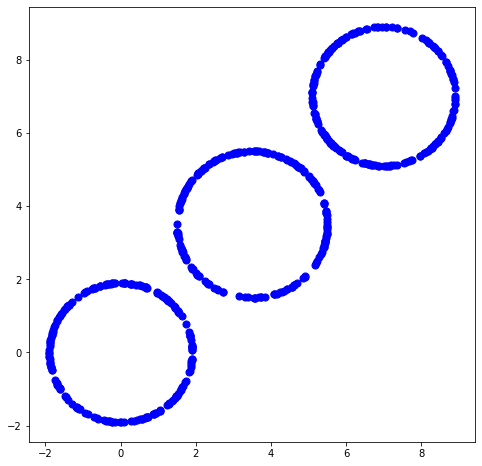

In [33]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2= np.array( [3.5,3.5] )
mu3=np.array([7,7])

tmp1 = genSphericalData( d, n, mu1, 1.9 )
tmp2=genSphericalData( d, n, mu2,2)
tmp3 = genSphericalData( d, n, mu3, 1.9 )

X = np.vstack( (tmp1, tmp2,tmp3) )

#plotting generated data
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

In [34]:
num_comp=3
fxd_wts=np.array([0.33,0.33,0.33])

In [35]:
# STORING IN A DATAFRAME
df=pd.DataFrame(X)

#ADDING LABEL COLUMN BY FIT PREDICT FUNCTION
df['label']=fit_predict(max_iter=500)

In [36]:
u_labels = np.unique(df['label'])

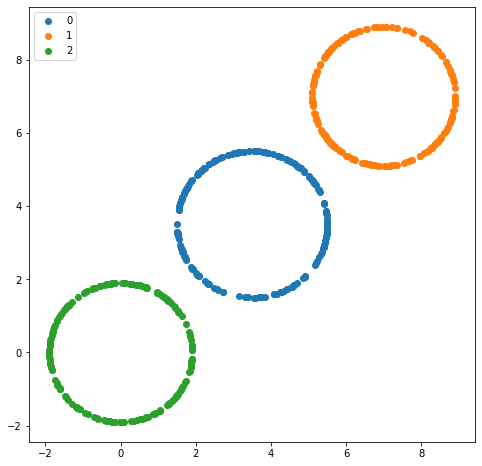

In [37]:
#PLOTTING CLUSTERS
fig = getFigure( 8, 8 )
for i in u_labels:
    plt.scatter(df[df['label'] == i].iloc[:,0],df[df['label'] == i].iloc[:,1],label = i)
plt.legend()
plt.show()

#FINISHED